
# A Deep Dive into Video Game Sales Data! 🌎

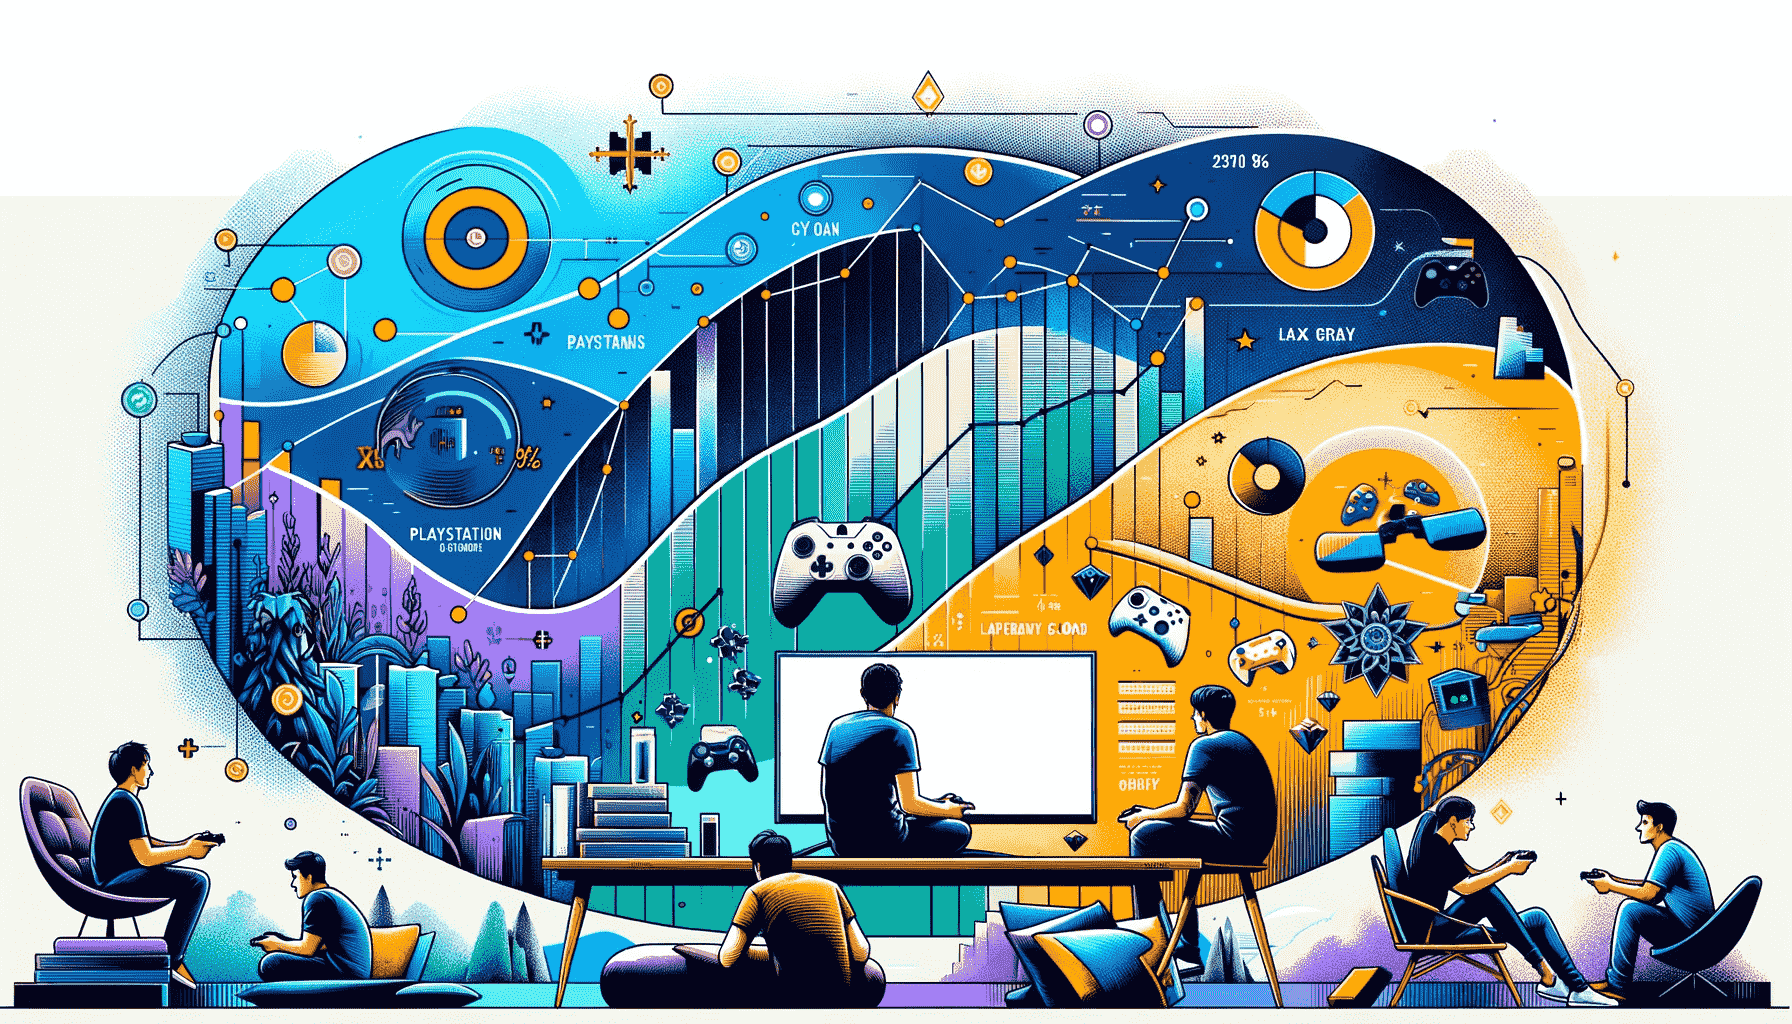


Hello! Welcome to the **My Project** 🎮 <br> This project will help you understand the gaming market's insight, and find out the potential sides of this market. Now, let's start this journey!

As a game publisher, you work for the gaming company right now. In order to provide guidance on developing a new kind of game, you are entitled to access more than 15,000 game-related data points, such as publisher, platform, sales, and game name.

You can download the CSV file [here](https://drive.google.com/file/d/1BSylf1yXych3atFfAz3IDuNcOVGuOkXm/view?usp=sharing). After that, put it in your Google Drive and change the path to your saved location on Google Drive at the below code cell.

*First*, please take a look on the explaination of each column in this dataset [here](https://docs.google.com/document/d/1jzZJVPkT7Yr8JUnQ3ZJUK8K4ihy632WqCNVefLU93XE/edit?usp=sharing).

# I. Preparation & Cleaning Data

#### 1/ Import relevant libraries

In [1]:
# Import library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### 2/ Overview of the dataset

In [2]:
pd.options.display.max_columns = None

In [3]:
# Import data
from google.colab import files
uploaded = files.upload()
games_sale = pd.read_csv('vgsales.csv')
games_sale

Saving vgsales.csv to vgsales.csv


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
14617,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
14618,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
14619,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
14620,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
# Give out the number of rows and columns of the dataset
games_sale.shape

(14622, 11)

This dataset contains 14,622 rows and 11 columns

Next, we will ascertain the type of data present in each column and provide a summary of the distribution of null values across all columns.

In [5]:
# Show out the basic information of the dataset
games_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14622 entries, 0 to 14621
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          14622 non-null  int64  
 1   Name          14622 non-null  object 
 2   Platform      14622 non-null  object 
 3   Year          14351 non-null  float64
 4   Genre         14622 non-null  object 
 5   Publisher     14564 non-null  object 
 6   NA_Sales      14622 non-null  float64
 7   EU_Sales      14622 non-null  float64
 8   JP_Sales      14622 non-null  float64
 9   Other_Sales   14622 non-null  float64
 10  Global_Sales  14622 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


This dataset contains the following data types:
- Number: `int64`, `float64`
- String: `object`

Besides, there are 2 columns that have null values:
- Year
- Publisher


#### 3/ Remove unwanted data

There are 3 columns that we do need for our analysis:
- Genre
- Publisher
- Name
- Platform


In [6]:
# Get the name of all columns
games_sale.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

#### 4/ Deal with missing values

In [7]:
# Create a new define for game_sales
df = games_sale

Even though we frequently utilize the drop function to cope with missing data, you shouldn't think of that as your first option. Before taking any further action, the most crucial thing you should know is how your data is understood.
Let's look at the columns that have values missing:




In [8]:
# Show out all the null data
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

 In some situations, we would like to know, in certain instances how these null values contribute to the total.



In [9]:
# Comparing the percentage of null values with the total
df.isnull().sum()/df.shape[0]

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.018534
Genre           0.000000
Publisher       0.003967
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

So it is believed that the missing values in these two columns are less than 10% of the total.






In [10]:
# Using dropna to drop the null values
df = df.dropna()

In [11]:
# Verify again if any null values remain.
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#### 5/ Deal with duplication

In [12]:
# Verify if any values are duplicated.
df.duplicated().sum()

0

We can proceed as there are no duplicate values present.


#### 6/ Correct labeled data for further analysis

In [13]:
# Give a briefly description of the dataframe
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000
mean,8534.011247,2007.946839,0.245608,0.146184,0.056537,0.051300,0.499920
std,4787.738367,4.049630,0.717437,0.516186,0.250135,0.200681,1.473167
min,1.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4398.500000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8631.000000,2008.000000,0.080000,0.020000,0.000000,0.010000,0.160000
75%,12707.500000,2011.000000,0.230000,0.110000,0.030000,0.040000,0.450000
max,16600.000000,2020.000000,41.490000,29.020000,6.500000,10.570000,82.740000


You may obtain the statistical details of each continuous variable in the dataset by using `df.describe()`.


#### 7/ Modify the data type

In [14]:
# Change the type of year from float into interger
df['Year'] = df['Year'].astype(int)

<ipython-input-14-599f68ab7914>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)


We need to change the type of float into integer for chart visualizing.

#### 8/ Chart Visualization

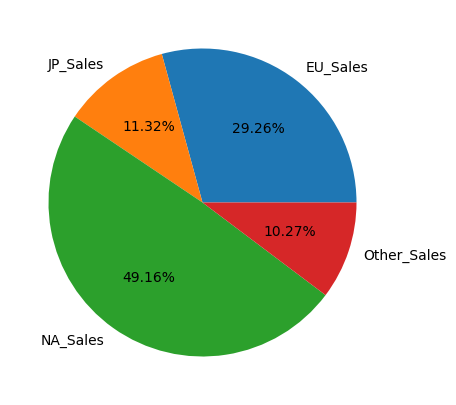

In [15]:
area_sales = df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
area_sales = area_sales.melt(var_name='Area',value_name='Total_Sales')
area_sales = area_sales.groupby('Area')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.pie(area_sales['Total_Sales'],labels=area_sales['Area'],autopct='%.2f%%')
sns.color_palette("rocket", as_cmap=True)
plt.show()

 What we can get from above Box plot of `Area_Sales`:
- Lowest Rank Consumption (10.24%): about 10% of our customers are from other region
- Third Rank Consumption (11.24%): About one / sixth of the customer is from Japan
- Second Rank Consumption (29.20%): Europeans accounts for nearly 30% of the gaming market
- Frist Rank Comsumption (49,32%): North America is the potential customer in the market cause they’re accounting for more than half of the market sales.

# II. Exploratory Data Analysis (EDA)




Coming up with several concepts before delving further into your dataset is a good technique. If not, you could want to go over each variable to see how your data is distributed and whether there's a chance you could combine them to create a novel insight!

To start, let's write a script for this dataset.

We have data about our sales in NA, EU, JP, and others
We also have some names of the publishers
Based on the above things, let's try to combine these to see whether there are any ideas that can be used 💡





#### 1/ Sorting Data

Now, we'll limit the dataframe to only include these three genres. Next, you will see a list of your rivals in the "Publisher" and "Genre? columns.


In [16]:
# Sorting Publishers
Publishers_sorting = ['Nintendo', 'Electronic Arts', 'Activision']

In [17]:
# Sorting game genres
Genres_sorting = ['Action', 'Sports','Shooter']

from the `df` dataframe. Based on their sales in the NA area, we will select three well-known publishers for the "Publishers" column.



In [18]:
# Show out the sale of each publisher in NA from higher to lower
df.groupby('Publisher')['NA_Sales'].sum().reset_index().sort_values('NA_Sales', ascending = False)

,Publisher,NA_Sales
108,Electronic Arts,528.46
285,Nintendo,495.17
15,Activision,395.18
414,Ubisoft,247.95
390,Take-Two Interactive,216.01
...,...,...
279,Naxat Soft,0.00
189,Interchannel,0.00
115,Epoch,0.00
275,NEC Interchannel,0.00


As this step illustrates. I'm displaying the dataframe's publisher count. Based in part on my own experiences working in the gaming industry. `Nintendo`, `Electronic Arts`, and `Activision` are the brands we plan to acquire.

Also from datafram `df`. We'll select a well-liked genre from those publishers.

In [19]:
# Count the number of game genres
df.groupby('Genre')['NA_Sales'].sum().reset_index().sort_values('NA_Sales', ascending = False)

,Genre,NA_Sales
0,Action,750.87
10,Sports,588.28
8,Shooter,485.56
3,Misc,362.63
7,Role-Playing,278.76
6,Racing,272.38
4,Platform,259.10
9,Simulation,163.55
2,Fighting,161.01
1,Adventure,82.55


From this chart's illustration. Three game categories are especially popular with customers: `shooters`, `sports`, and `action`.  





Now, we'll sort the average (NA_Sales) of Nintendo.







In [20]:
# Sorting the values for Nintendo
Nintendo = df[(df['Publisher'] == 'Nintendo') & (df['Genre'].isin(Genres_sorting)) & (df['Year'] < 2016 )]


Next, we'll sort the average (NA_Sales) of Activision.










In [21]:
# Sorting the values for Activision
Activision= df[(df['Publisher'] == 'Activision') & (df['Genre'].isin(Genres_sorting)) & (df['Year'] < 2016 )]


Then, we'll sort the average (NA_Sales) of Electronic Arts.










In [22]:
# Sorting the values for EA
EA = df[(df['Publisher'] == 'Electronic Arts') & (df['Genre'].isin(Genres_sorting)) & (df['Year'] < 2016 )]


As you can see, the three publishers are the ones with the most market share of clients. We will now delve thoroughly into how Activision, Nintendo, and EA may do it. The selection of less than 2016 was made since the lacking data from that year makes it impossible to derive the appropriate insight.


# III. Insights


### A/ Sport Genre

 At this point. We'll show the genre I've chosen for three publishers. We'll look at why this publisher sold more in this genre than other publishers, and vice versa.



Now we'll visualize the sports genre of those publishers.









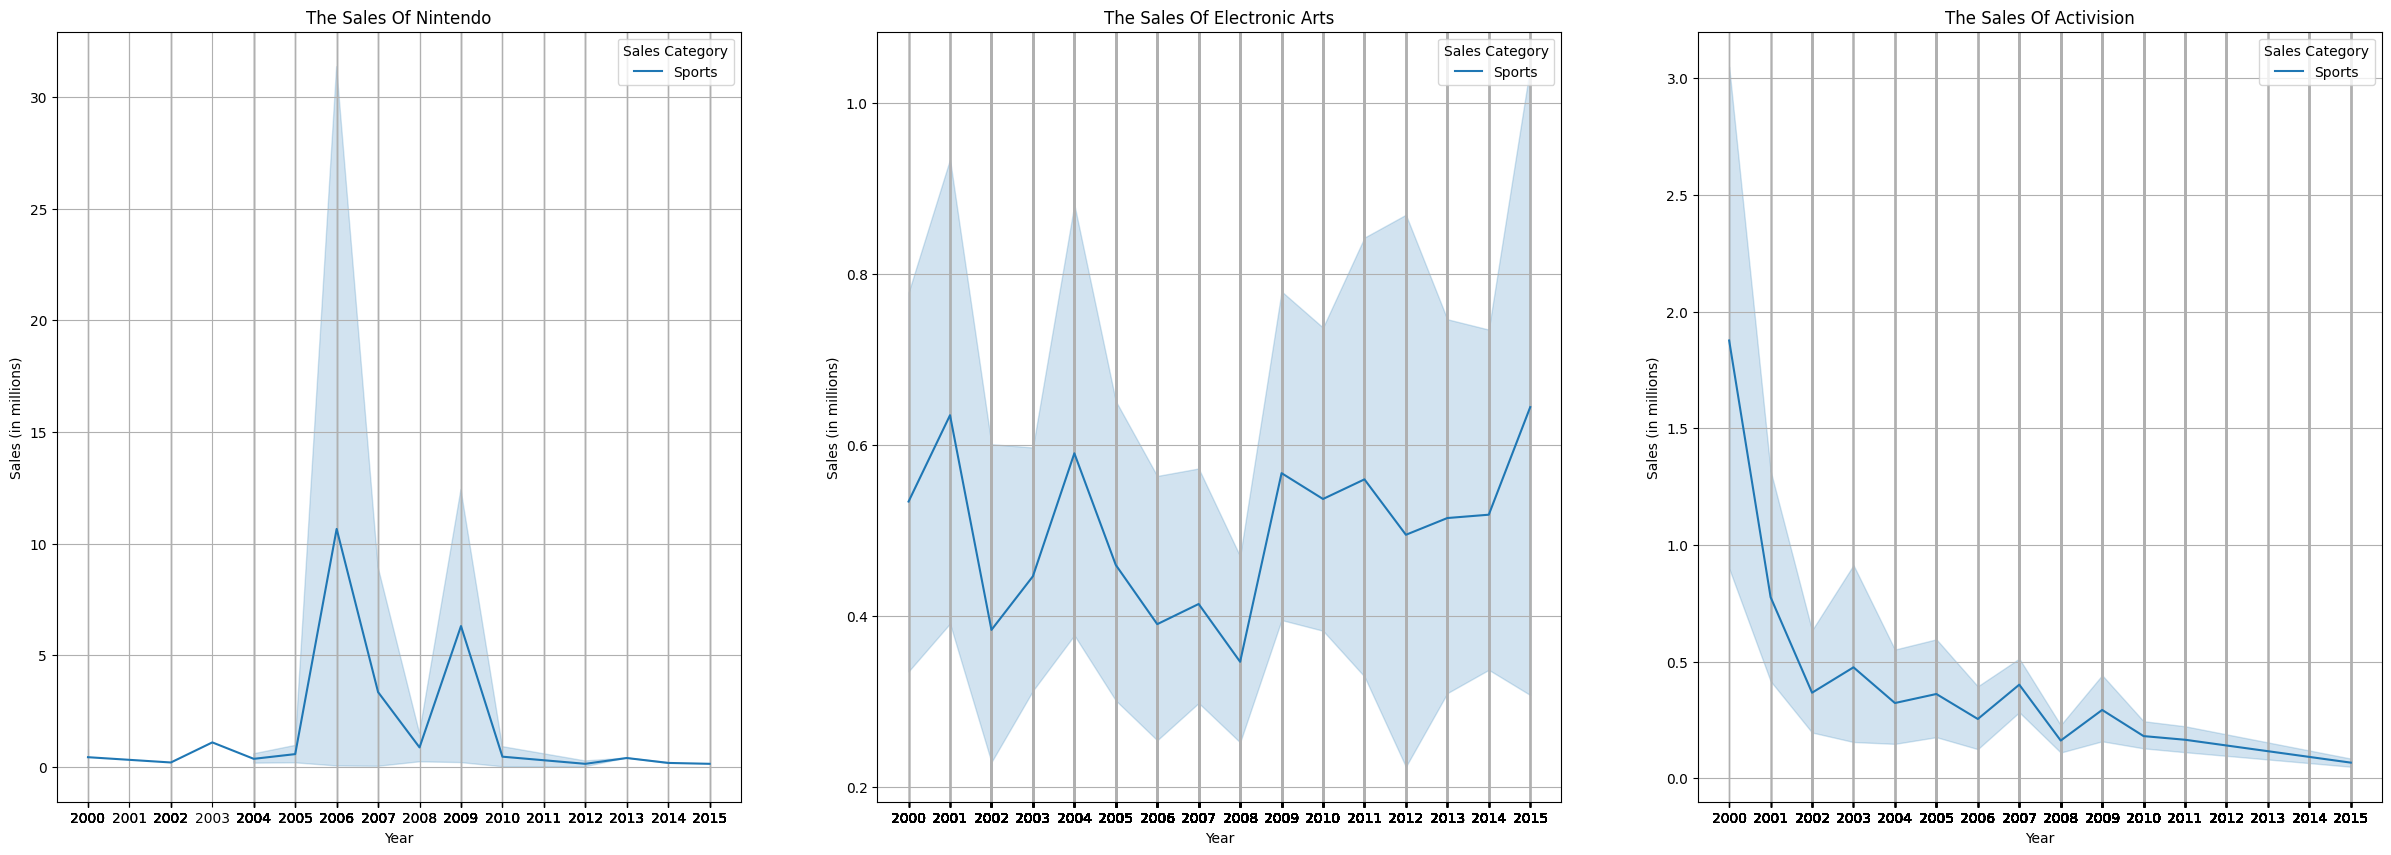

In [23]:
# Innitiate a figure
plt.figure(figsize=(30, 10))


# Point to the first subplot
# First subplot is in the layout of 1 row, 3 columns, first slot.
plt.subplot(131)
sns.lineplot(data= Nintendo[Nintendo['Genre']=='Sports'] , x='Year', y='NA_Sales', hue='Genre', palette='tab10')
plt.xlabel('Year')

plt.ylabel('Sales (in millions)')
plt.title('The Sales Of Nintendo')
plt.legend(title='Sales Category', loc='upper right')
plt.grid(True)
plt.xticks(Nintendo['Year'])



# Point to the first subplot
# Second subplot is in the layout of 1 row, 3 columns, second slot.
plt.subplot(132)
sns.lineplot(data= EA[EA['Genre']=='Sports'], x='Year', y='NA_Sales', hue='Genre', palette='tab10')
plt.xlabel('Year')

plt.ylabel('Sales (in millions)')
plt.title('The Sales Of Electronic Arts')
plt.legend(title='Sales Category', loc='upper right')
plt.grid(True)
plt.xticks(EA['Year'])

# Point to the first subplot
# Third subplot is in the layout of 1 row, 3 columns, Third slot.
plt.subplot(133)
sns.lineplot(data= Activision[Activision['Genre']=='Sports'], x='Year', y='NA_Sales', hue='Genre', palette='tab10')
plt.xlabel('Year')

plt.ylabel('Sales (in millions)')
plt.title('The Sales Of Activision')
plt.legend(title='Sales Category', loc='upper right')
plt.grid(True)
plt.xticks(Activision['Year'])


plt.show()

The graphic shows that Nintendo has the largest video game sales of all time when compared to the other two. However, they peaked in 2006. So the question is, what kind of games did they publish during that time period? Now, we'll find out.



#### 1/ Nintendo

First we'll analyze the `Sport` genre of Nintendo


In [24]:
# Display the list of sold name games.
Nintendo_sports_games = df[(df['Genre'] == 'Sports')  & (df['Publisher'] == 'Nintendo') & (df['Year'] >= 2005) & (df['Year'] <= 2010)]
Nintendo_sports_games = Nintendo_sports_games[['Name', 'Year','Platform','NA_Sales']]
Nintendo_sports_games

,Name,Year,Platform,NA_Sales
0,Wii Sports,2006,Wii,41.49
2,Wii Sports Resort,2009,Wii,15.75
8,Wii Fit,2007,Wii,8.94
9,Wii Fit Plus,2009,Wii,9.09
460,Mario Strikers Charged,2007,Wii,1.07
618,Mario Sports Mix,2010,Wii,0.90
708,Mario Super Sluggers,2008,Wii,1.51
907,Mario Hoops 3 on 3,2006,DS,0.99
912,Super Mario Strikers,2005,GC,0.98
1014,New Play Control! Mario Power Tennis,2009,Wii,0.37


The table shows that Will Sport & Will Sport Resort is the title of the game that caused Nintendo's sales to skyrocket amid the economic crisis. Why is this game so popular? We're going to get depper in straight now.



Initially, we will ascertain which platform is the most widely used and why users choose to play that particular game on it.


In [25]:
# Display the list of Nintendo platform
Nintendo['Platform'].value_counts()

Platform
Wii     25
3DS     20
GBA     15
GC      14
WiiU    13
DS      12
N64      5
GB       2
Name: count, dtype: int64

In [26]:
Nintendo_Platform = Nintendo[(Nintendo['Genre'] == 'Sports')  & (df['Publisher'] == 'Electronic Arts') & (df['Platform'].str.contains('Wii|3DS|GBA|GC|WiiU|DS|N64|GB'))]
Nintendo_Platform = Nintendo.groupby(['Platform','Year'])['NA_Sales'].sum().to_frame().reset_index().sort_values('NA_Sales',ascending = False)

<ipython-input-26-4d734a6a1820>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Nintendo_Platform = Nintendo[(Nintendo['Genre'] == 'Sports')  & (df['Publisher'] == 'Electronic Arts') & (df['Platform'].str.contains('Wii|3DS|GBA|GC|WiiU|DS|N64|GB'))]


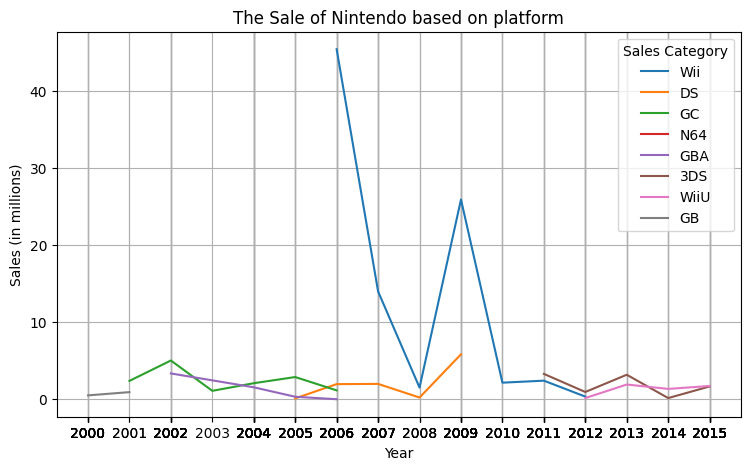

In [27]:
# Innitiate a figure
plt.figure(figsize=(30, 5))


# Point to the first subplot
# First subplot is in the layout of 1 row, 3 columns, first slot.
plt.subplot(131)
sns.lineplot(data=Nintendo_Platform , x='Year', y='NA_Sales', hue='Platform', palette='tab10')
plt.xlabel('Year')

plt.ylabel('Sales (in millions)')
plt.title('The Sale of Nintendo based on platform')
plt.legend(title='Sales Category', loc='upper right')
plt.grid(True)
plt.xticks(Nintendo['Year'])
plt.show()

According to the data I've found. Following the huge success of Nintendo's Wii system launch in 2006, the Wii platform has grown to be the most widely used. Its unique motion-controlled gameplay drew in a wider audience, including families and casual players, which can have an impact on Nintendo's sales. The Wii's motion controls are a perfect match for sports games, which provide a simple and entertaining gameplay experience



#### 2/ Electronic Arts

Next we'll analyze the `Sport` genre of EA

Speaking about EA, Nintendo's sales fell sharply following their 2009 peak. The sale of EA has increased, though. The question here is why Electronic Arts increased and Nindento, the leading player in sports genres, declined. We're going to learn why this is happening soon.



In [28]:
# Display the list of sold name games.
EA_sports_games = df[(df['Genre'] == 'Sports')  & (df['Publisher'] == 'Electronic Arts') & (df['Year'] <= 2015)]
EA_sports_games = EA_sports_games[['Name', 'Year','Platform','NA_Sales']]
EA_sports_games

,Name,Year,Platform,NA_Sales
59,FIFA 16,2015,PS4,1.11
86,FIFA 14,2013,PS3,0.78
94,FIFA 12,2011,PS3,0.84
97,FIFA 15,2014,PS4,0.79
154,FIFA Soccer 11,2010,PS3,0.60
...,...,...,...,...
13843,Football Academy,2009,DS,0.00
13878,FIFA Soccer 08,2007,PC,0.00
14049,UEFA Champions League 2006-2007,2007,PSP,0.01
14162,Madden NFL 13,2012,PS3,0.00


In [29]:
# Display the list of Nintendo platform
EA['Name'].value_counts()

Name
FIFA 14                          9
FIFA Soccer 13                   8
Madden NFL 07                    8
Madden NFL 08                    8
FIFA 15                          8
                                ..
NFL Street 3                     1
The Godfather: Dons Edition      1
FIFA 2001 Major League Soccer    1
SSX Blur                         1
Command & Conquer Renegade       1
Name: count, Length: 292, dtype: int64

In [30]:
# Extract the series FIFA and NFL sale
EA_games = EA_sports_games[EA_sports_games['Name'].str.contains('FIFA|Madden NFL') & (df['Year'] <= 2015)]
EA_games

<ipython-input-30-42d8f2d0babe>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  EA_games = EA_sports_games[EA_sports_games['Name'].str.contains('FIFA|Madden NFL') & (df['Year'] <= 2015)]


,Name,Year,Platform,NA_Sales
59,FIFA 16,2015,PS4,1.11
86,FIFA 14,2013,PS3,0.78
94,FIFA 12,2011,PS3,0.84
97,FIFA 15,2014,PS4,0.79
154,FIFA Soccer 11,2010,PS3,0.60
...,...,...,...,...
12374,FIFA World Cup: Germany 2006,2006,GBA,0.02
12897,Madden NFL 07,2006,GBA,0.02
13267,FIFA Soccer 09,2008,PC,0.00
13878,FIFA Soccer 08,2007,PC,0.00


In [32]:
# Display the sale for the game
Sport_Sale = EA_games.groupby('Name')['NA_Sales'].sum().sort_values(ascending=False)
Sport_Sale

Name
Madden NFL 07                         7.89
Madden NFL 08                         7.15
Madden NFL 06                         7.14
Madden NFL 2005                       6.85
Madden NFL 10                         6.56
Madden NFL 09                         6.07
Madden NFL 16                         5.78
Madden NFL 13                         5.67
Madden NFL 15                         5.66
Madden NFL 11                         5.18
Madden NFL 12                         4.99
Madden NFL 25                         4.85
Madden NFL 2003                       4.80
Madden NFL 2002                       4.39
Madden NFL 2001                       3.37
FIFA 15                               3.20
FIFA 16                               2.98
FIFA 14                               2.84
FIFA 12                               2.08
FIFA Soccer 08                        1.96
FIFA Soccer 10                        1.94
FIFA Soccer 11                        1.94
FIFA Soccer 09                        1.70
Madden

As you can see from the table, the FIFA and NFL game series, which are football games, is extremely popular. However, according to my findings. There are numerous explanations for the game's popularity. However, there is one big reason why people adore this game what is the platform on which they use to play.

In [33]:
# Display the list of EA platform
EA['Platform'].value_counts()

Platform
PS2     140
X360    123
PS3     107
XB       89
GC       63
PSP      56
PC       51
Wii      50
DS       32
GBA      29
XOne     18
PS4      17
PS       13
3DS       6
PSV       5
N64       4
WiiU      2
GB        1
Name: count, dtype: int64

From the surface. Presumably, the PS platform is the most widely utilized platform. We'll investigate the specific causes of this.


In [34]:
EA_sport_Platform = df[(df['Genre'] == 'Sports')  & (df['Publisher'] == 'Electronic Arts') & (df['Platform'].str.contains('PS2|PS3|PS4'))]
EA_sport_Platform = EA_sport_Platform.groupby(['Platform','Year'])['NA_Sales'].sum().to_frame().reset_index().sort_values('NA_Sales',ascending = False)

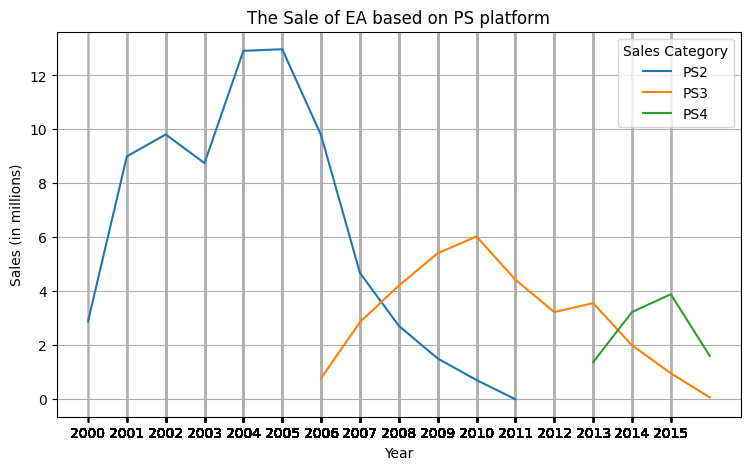

In [35]:
# Innitiate a figure
plt.figure(figsize=(30, 5))


# Point to the first subplot
# First subplot is in the layout of 1 row, 3 columns, first slot.
plt.subplot(131)
sns.lineplot(data= EA_sport_Platform , x='Year', y='NA_Sales', hue='Platform', palette='tab10')
plt.xlabel('Year')

plt.ylabel('Sales (in millions)')
plt.title('The Sale of EA based on PS platform')
plt.legend(title='Sales Category', loc='upper right')
plt.grid(True)
plt.xticks(EA['Year'])
plt.show()

As you can see from the chart. It is believed that the users seem to be more willing to spend their money on buying the new platform to experience the quality of gaming, such as the graphics, show, and control, cause the chart shows that after a new platform is relished, the sale based on the old platform is decreased.

Since sports games are meant to be played in multiplayer with friends and family, our company may concentrate on developing a kind of sports game that has an appropriate gameplay, aesthetics, and outlook that allows players of all ages to interact with one another.


Platforms like the PS4, which has produced a highly detailed quality that could improve gamers' gaming experiences, should put more emphasis on graphics.


### B/ Shooter Genre

Next, we'll visualize the Shooter genre of those publishers.

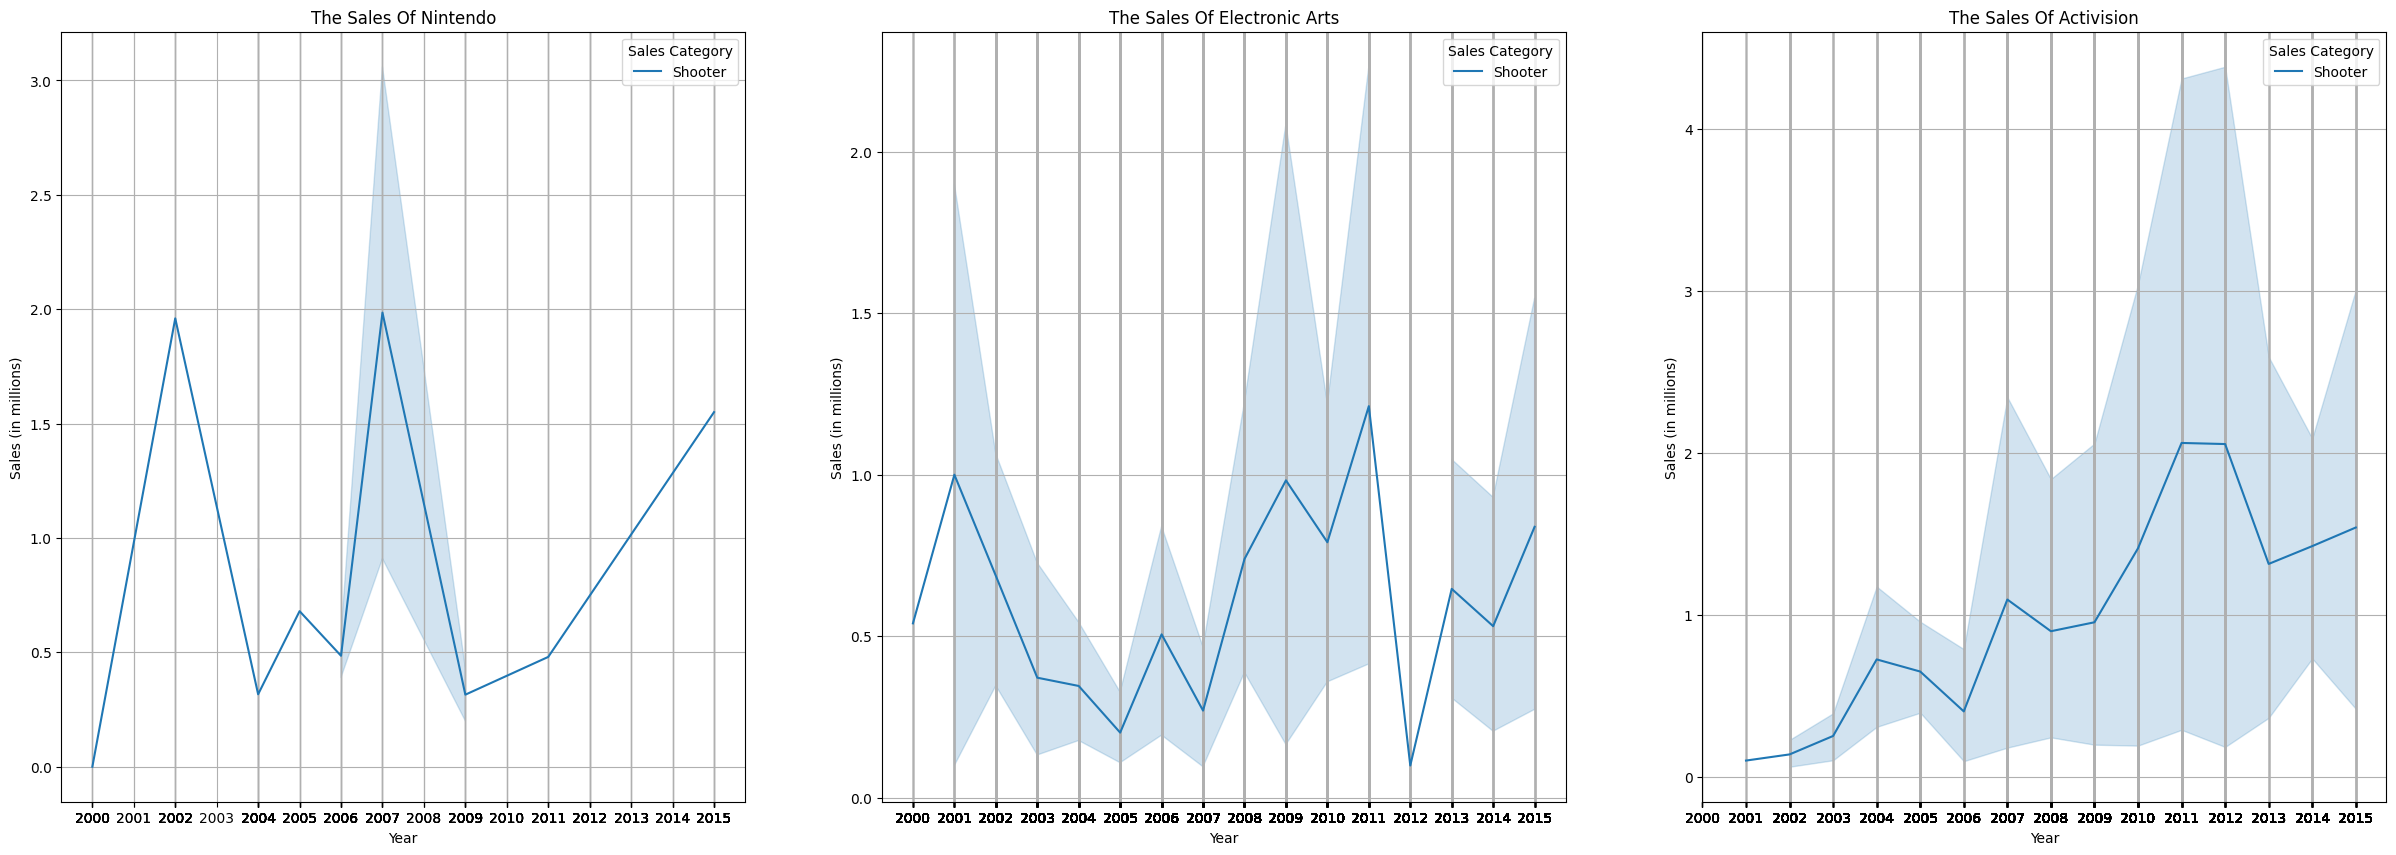

In [36]:
# Innitiate a figure
plt.figure(figsize=(30, 10))


# Point to the first subplot
# First subplot is in the layout of 1 row, 3 columns, first slot.
plt.subplot(131)
sns.lineplot(data= Nintendo[Nintendo['Genre']=='Shooter'] , x='Year', y='NA_Sales', hue='Genre', palette='tab10')
plt.xlabel('Year')

plt.ylabel('Sales (in millions)')
plt.title('The Sales Of Nintendo')
plt.legend(title='Sales Category', loc='upper right')
plt.grid(True)
plt.xticks(Nintendo['Year'])



# Point to the first subplot
# Second subplot is in the layout of 1 row, 3 columns, second slot.
plt.subplot(132)
sns.lineplot(data= EA[EA['Genre']=='Shooter'], x='Year', y='NA_Sales', hue='Genre', palette='tab10')
plt.xlabel('Year')

plt.ylabel('Sales (in millions)')
plt.title('The Sales Of Electronic Arts')
plt.legend(title='Sales Category', loc='upper right')
plt.grid(True)
plt.xticks(EA['Year'])

# Point to the first subplot
# Third subplot is in the layout of 1 row, 3 columns, Third slot.
plt.subplot(133)
sns.lineplot(data= Activision[Activision['Genre']=='Shooter'], x='Year', y='NA_Sales', hue='Genre', palette='tab10')
plt.xlabel('Year')

plt.ylabel('Sales (in millions)')
plt.title('The Sales Of Activision')
plt.legend(title='Sales Category', loc='upper right')
plt.grid(True)
plt.xticks(Activision['Year'])


plt.show()

The graph indicates a growing trend in the popularity of shooting games from three publishers. Nevertheless, why can a well-known publisher of sports games, such as Nintendo, be successful in the shooter genre. We are going to find out immediately.




#### 1/ Nintendo

First we'll analyze the `Shooter` genre of Nintendo

In [37]:
# Show the list of games with sold-out names.
Nintendo_Shooter_games = df[(df['Genre'] == 'Shooter')  & (df['Publisher'] == 'Nintendo') & (df['Year'] <= 2015)]
Nintendo_Shooter_games = Nintendo_Shooter_games[['Name', 'Year','Platform','NA_Sales']]
Nintendo_Shooter_games

,Name,Year,Platform,NA_Sales
156,Link's Crossbow Training,2007,Wii,3.06
180,Splatoon,2015,WiiU,1.55
411,Metroid Prime,2002,GC,1.96
757,Metroid Prime 3: Corruption,2007,Wii,0.91
1179,Metroid Prime 2: Echoes,2004,GC,0.87
1514,Star Fox: Assault,2005,GC,0.68
1750,Star Fox 64 3D,2011,3DS,0.48
2120,Metroid Prime Hunters,2006,DS,0.58
2626,Metroid Prime: Trilogy,2009,Wii,0.43
3077,Star Fox Command,2006,DS,0.39


The popularity of Nintendo shooting games has grown for a number of reasons. Family-friendly video games are synonymous with Nintendo. Realistic violence is subordinated to entertaining and captivating gameplay mechanics in Nintendo shooter games. They might use imaginative weaponry, goals, and character traits that appeal to a larger group of people.

[Explaination](https://www.cheatcc.com/articles/why-nintendo-is-still-a-favorite-of-all-ages/)

#### 2/ Electronic Arts

Next, we'll analyze the `Shooter` genre of Electronic Arts

In [38]:
EA_shooter_games = df[(df['Genre'] == 'Shooter')  & (df['Publisher'] == 'Electronic Arts') & (df['Year'] >= 2011) & (df['Year'] < 2016 ) & (df['NA_Sales'])]
EA_shooter_games = EA_shooter_games[['Name', 'Year','Platform','NA_Sales']]
EA_shooter_games

,Name,Year,Platform,NA_Sales
71,Star Wars Battlefront (2015),2015,PS4,2.93
75,Battlefield 3,2011,X360,4.46
79,Battlefield 3,2011,PS3,2.85
260,Battlefield 4,2013,PS3,1.30
284,Battlefield 4,2013,X360,2.14
294,Star Wars Battlefront (2015),2015,XOne,1.94
302,Battlefield 4,2013,PS4,1.34
391,Titanfall,2014,XOne,1.84
420,Battlefield 3,2011,PC,0.89
632,Battlefield: Hardline,2015,PS4,0.70


According to the data, the game that increased EA's sales in 2011 was Battlefield 3. Why is this game so well-liked? We are going to bring Decker in immediately.

The spike in popularity of Battlefield 3 in 2011 can be ascribed to multiple significant factors. First, there's the attention to detail: carefully thought-out animations, sound effects, and weapon features all contribute to the game's increased realism and immersion. The game's use of the potent Frostbite engine, which provided a notable visual improvement over earlier a games, comes in second. The overall aesthetics were amazing for the age, and environments could be destroyed more dynamically, making the combat feel more realistic.Class System and Teamwork: On the battlefield, teamwork and strategic cooperation were fostered by the class system, which consisted of diverse jobs such as Assault, Engineer, Support, and Recon. Moreover, Vehicle conflict with a range of vehicles (tanks, aircraft, helicopters) that players may use for strategic purposes, the game maintained the series' emphasis on combined arms conflict.

[Explaination](https://www.imdb.com/title/tt1954263/reviews/)

We're going to investigate why people love this game and what platform they play it on now.


In [39]:
EA_shooter_Platform = df[(df['Genre'] == 'Sports')  & (df['Publisher'] == 'Electronic Arts') & (df['Platform'].str.contains('X360|PS3|PS4'))]
EA_shooter_Platform = EA_shooter_Platform.groupby(['Platform','Year'])['NA_Sales'].sum().to_frame().reset_index().sort_values('NA_Sales',ascending = False)

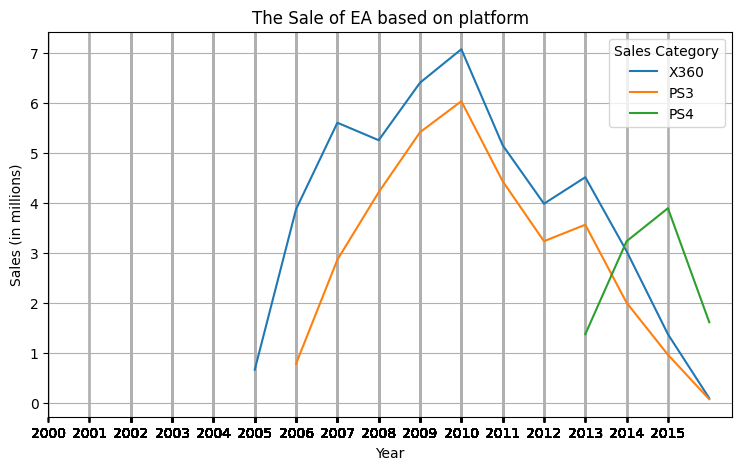

In [40]:
# Innitiate a figure
plt.figure(figsize=(30, 5))


# Point to the first subplot
# First subplot is in the layout of 1 row, 3 columns, first slot.
plt.subplot(131)
sns.lineplot(data= EA_shooter_Platform , x='Year', y='NA_Sales', hue='Platform', palette='tab10')
plt.xlabel('Year')

plt.ylabel('Sales (in millions)')
plt.title('The Sale of EA based on platform')
plt.legend(title='Sales Category', loc='upper right')
plt.grid(True)
plt.xticks(EA['Year'])
plt.show()

As the chart illustrates. Because the chart indicates that sales of the previous platform decline after the introduction of a new one, it is thought that consumers are more inclined to part with their cash to enjoy the new platform's superior graphics, show, and control.


#### 3/ Activision

Final, we'll analyze the `Shooter` genre of Activison

In 2012, Activision saw a sharp spike in sales while EA saw a sharp decline.  We will now discover which gaming title led to Activision's growth and the reason behind it.

In [41]:
Activision_shooter_games = df[(df['Genre'] == 'Shooter')  & (df['Publisher'] == 'Activision') & (df['Year'] < 2016 )]
Activision_shooter_games = Activision_shooter_games[['Name', 'Year','Platform','NA_Sales']]
Activision_shooter_games

,Name,Year,Platform,NA_Sales
21,Call of Duty: Modern Warfare 3,2011,X360,9.03
22,Call of Duty: Black Ops,2010,X360,9.67
24,Call of Duty: Black Ops 3,2015,PS4,5.77
25,Call of Duty: Black Ops II,2012,PS3,4.99
26,Call of Duty: Black Ops II,2012,X360,8.25
...,...,...,...,...
13531,"Transformers: Revenge of the Fallen (XBox 360,...",2009,PC,0.02
13652,James Bond 007: Blood Stone,2010,PC,0.02
13935,Enemy Territory: Quake Wars,2007,PC,0.01
14364,Greg Hastings' Tournament Paintball Max'd,2006,PS2,0.01


In [42]:
# Extract the series FIFA and NFL sale
Activison_games = Activision_shooter_games[Activision_shooter_games['Name'].str.contains('Call of Duty') & (df['Year'] <= 2015)]
Activison_games

<ipython-input-42-2c797fa507bc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Activison_games = Activision_shooter_games[Activision_shooter_games['Name'].str.contains('Call of Duty') & (df['Year'] <= 2015)]


,Name,Year,Platform,NA_Sales
21,Call of Duty: Modern Warfare 3,2011,X360,9.03
22,Call of Duty: Black Ops,2010,X360,9.67
24,Call of Duty: Black Ops 3,2015,PS4,5.77
25,Call of Duty: Black Ops II,2012,PS3,4.99
26,Call of Duty: Black Ops II,2012,X360,8.25
27,Call of Duty: Modern Warfare 2,2009,X360,8.52
28,Call of Duty: Modern Warfare 3,2011,PS3,5.54
31,Call of Duty: Black Ops,2010,PS3,5.98
43,Call of Duty: Modern Warfare 2,2009,PS3,4.99
48,Call of Duty: Ghosts,2013,X360,6.72


In [43]:
Activison_shooter_Platform = df[(df['Genre'] == 'Shooter')  & (df['Publisher'] == 'Activision') & (df['Platform'].str.contains('X360|PS3|PS4|PC'))]
Activison_shooter_Platform = Activison_shooter_Platform.groupby(['Platform','Year'])['NA_Sales'].sum().to_frame().reset_index().sort_values('NA_Sales',ascending = False)

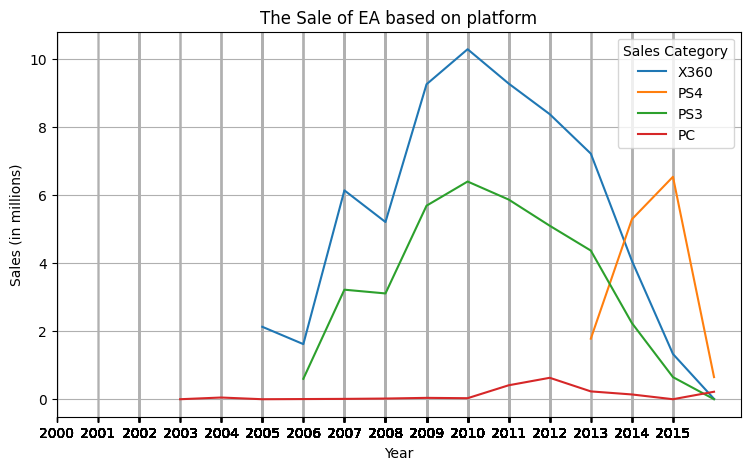

In [44]:
# Innitiate a figure
plt.figure(figsize=(30, 5))


# Point to the first subplot
# First subplot is in the layout of 1 row, 3 columns, first slot.
plt.subplot(131)
sns.lineplot(data= Activison_shooter_Platform , x='Year', y='NA_Sales', hue='Platform', palette='tab10')
plt.xlabel('Year')

plt.ylabel('Sales (in millions)')
plt.title('The Sale of EA based on platform')
plt.legend(title='Sales Category', loc='upper right')
plt.grid(True)
plt.xticks(Activision['Year'])
plt.show()

As seen in the chart. It is believed that customers are more willing to spend money on the new platform because of its better show, control, and visuals because the data shows that sales of the old platform fall after the launch of a new one.



Based on the data, Call of Duty: Modern Warfare 3 was the game that helped EA's sales in 2011. Why is everyone so fond of this game? Reasons will be brought in right away.


Call of Duty: Modern Warfare 3 (MW3) achieved immense popularity in 2011 for several reasons. First is Call of Duty: Modern Warfare 3 was a direct continuation of Call of Duty 4: Modern Warfare and Call of Duty: Modern Warfare 2, providing a satisfying wrap to a well-liked story arc. Those who had made the time to play the earlier games were excited to learn how the story would end. Enhanced and Simplified Gameplay: Modern Warfare 3 refined and enhanced the fundamental gameplay of Modern Warfare and Modern Warfare 2. It provided a recognizable and polished experience with possibly better weapon balancing, map design, and gameplay.



Based on Nintendo's experience, it is thought that the shooter game generation is a one-target consumer game. We can design a game that is more visually appealing or colorful to draw in more players of all ages.


Based on the shooter genre's attributes. Because of the demands of the genre and the nature of gameplay, this type of game—especially those in the first- and third-person categories—requires a high level of concentration. Having a good platform also enhances the gaming experience by improving visibility and accurate hit detection.


It's thought that players prefer to play games with interesting campaigns because of the Call of Duty series as an example: Strong, story-driven single-player campaigns with dramatic storytelling, compelling characters, and cinematic moments can be found in many "Call of Duty" games. These tales frequently incorporate historical events from reality, which gives them more nuance and appeal. We can also include this into the design of a novel shooter game.


### C/ Action Genre

Finally, we'll visualize the Shooter genre of those publishers.

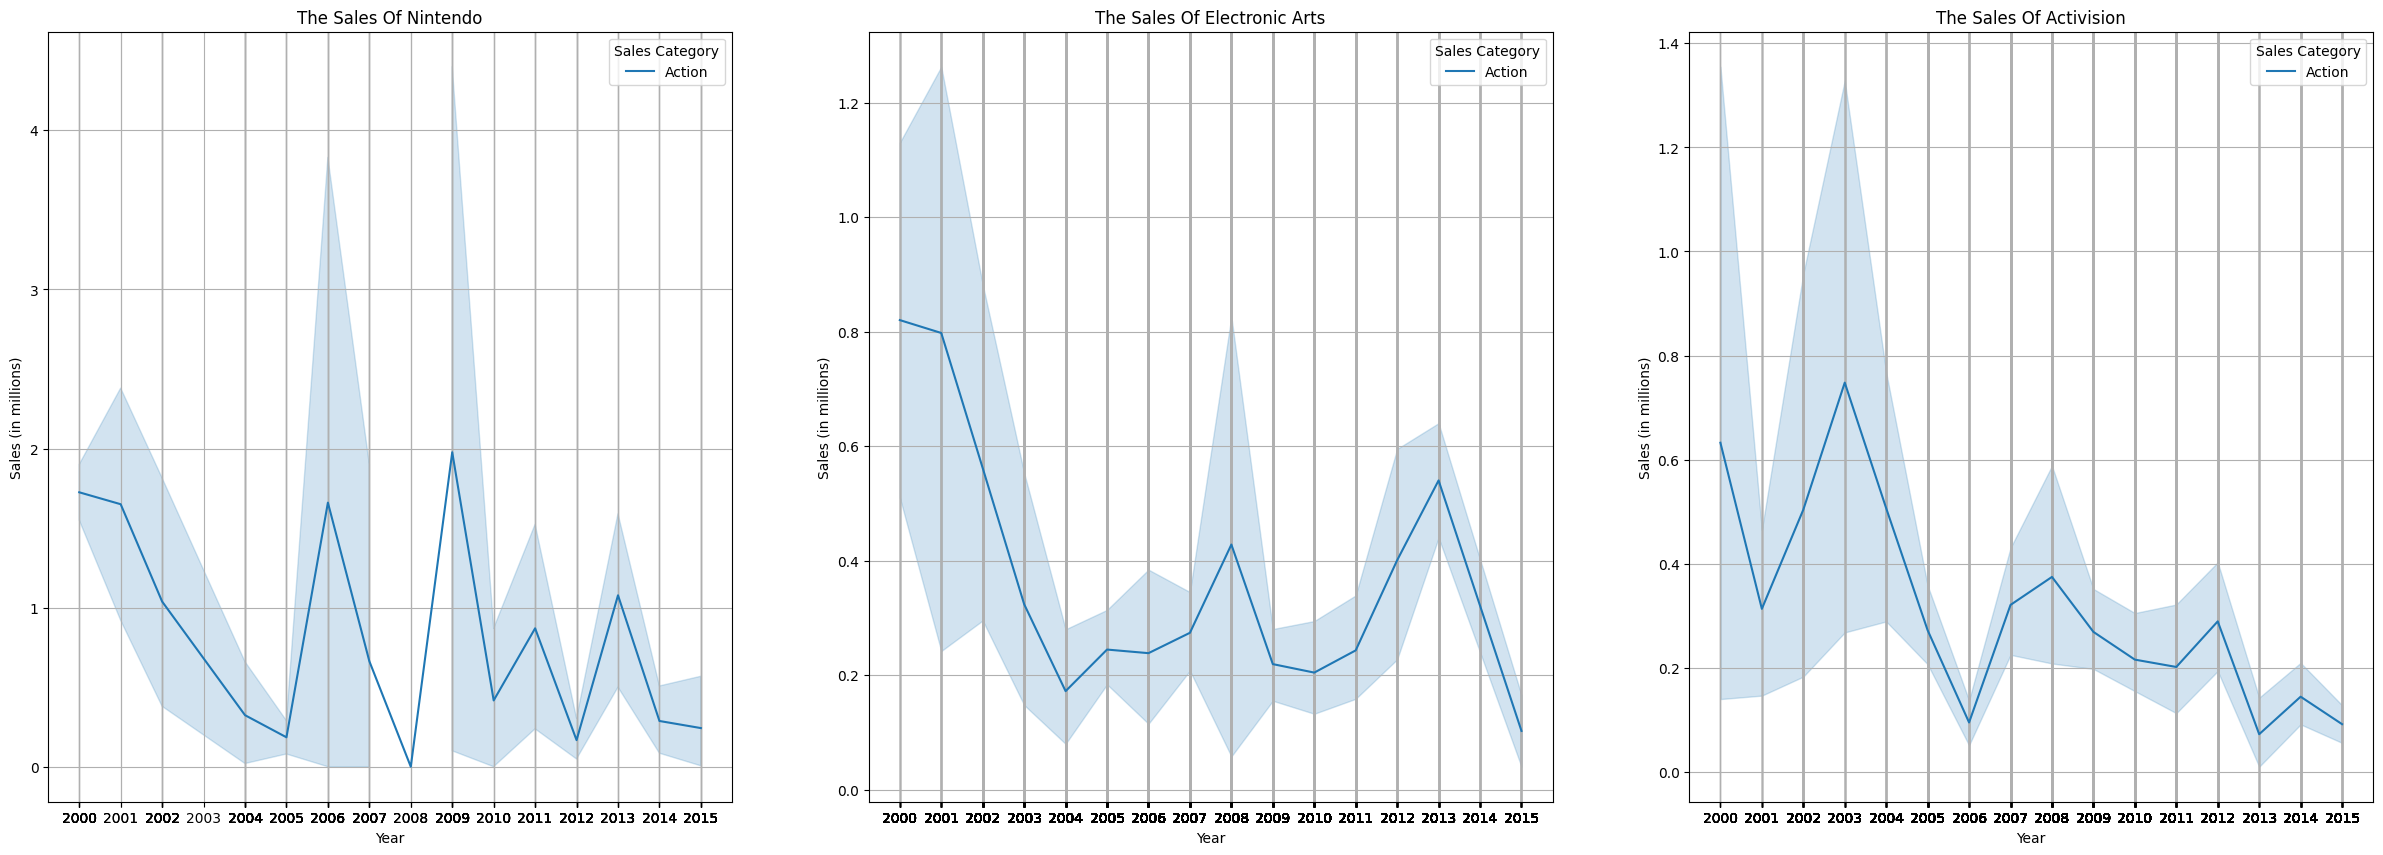

In [45]:
# Innitiate a figure
plt.figure(figsize=(30, 10))


# Point to the first subplot
# First subplot is in the layout of 1 row, 3 columns, first slot.
plt.subplot(131)
sns.lineplot(data= Nintendo[Nintendo['Genre']=='Action'] , x='Year', y='NA_Sales', hue='Genre', palette='tab10')
plt.xlabel('Year')

plt.ylabel('Sales (in millions)')
plt.title('The Sales Of Nintendo')
plt.legend(title='Sales Category', loc='upper right')
plt.grid(True)
plt.xticks(Nintendo['Year'])



# Point to the first subplot
# Second subplot is in the layout of 1 row, 3 columns, second slot.
plt.subplot(132)
sns.lineplot(data= EA[EA['Genre']=='Action'], x='Year', y='NA_Sales', hue='Genre', palette='tab10')
plt.xlabel('Year')

plt.ylabel('Sales (in millions)')
plt.title('The Sales Of Electronic Arts')
plt.legend(title='Sales Category', loc='upper right')
plt.grid(True)
plt.xticks(EA['Year'])

# Point to the first subplot
# Third subplot is in the layout of 1 row, 3 columns, Third slot.
plt.subplot(133)
sns.lineplot(data= Activision[Activision['Genre']=='Action'], x='Year', y='NA_Sales', hue='Genre', palette='tab10')
plt.xlabel('Year')

plt.ylabel('Sales (in millions)')
plt.title('The Sales Of Activision')
plt.legend(title='Sales Category', loc='upper right')
plt.grid(True)
plt.xticks(Activision['Year'])


plt.show()

From the chart above. It is believed that the market for action games has been decreasing over the years so it is hard to find any explanation for developing a new type of game based on this data.


This has led to the data being shown. It is thought that our business should concentrate more on the two categories that customers are most likely to enjoy, which are sports and shooting.  


# IV. Conclusion

The analysis of video game sales provides invaluable insights that can drive strategic, creative, and financial decision-making within the gaming industry. By examining sales data, our companies can better understand market trends, consumer preferences, and competitive dynamics. This understanding helps in optimizing game development to align with player interests, enhancing marketing strategies to target the right audiences, and managing production budgets more effectively.

Furthermore, sales analysis is crucial for forecasting future market movements and adapting to shifts in consumer behavior. It aids in identifying successful franchises, predicting the potential success of new titles, and making informed decisions regarding sequels and expansions.

Additionally, such analysis contributes to a more tailored approach to global distribution, helping companies determine which geographic markets to focus on and how to customize their games for local preferences.

Overall, a thorough analysis of video game sales not only boosts a company's ability to innovate and grow in alignment with market demands but also enhances its capability to deliver engaging and successful gaming experiences to a diverse and global audience. This strategic approach ultimately contributes to sustained revenue growth and a stronger competitive position in the dynamic gaming industry.


# Final Words

Thank you for spending your precious time in reading my above project. Please kindly see my presentation slide with visualization in Canva in following link:

[Presentation](https://www.canva.com/design/DAGE78IYfXQ/StdeXxJwv6hPgjReLKypLA/edit?utm_content=DAGE78IYfXQ&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)